### 패키지 설치

In [3]:
%pip install matplotlib pillow tqdm numpy scipy pandas


Note: you may need to restart the kernel to use updated packages.


In [4]:
# 한글

!pip install koreanize_matplotlib
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import koreanize_matplotlib

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


---

### 경로 확인

In [5]:
import os

BASE_DIR = r"E:\ai05-level1-project"
IMG_DIR = os.path.join(BASE_DIR, "train_images")
ANN_ROOT = os.path.join(BASE_DIR, "train_annotations")

print("IMG_DIR exists:", os.path.exists(IMG_DIR))
print("ANN_DIR exists:", os.path.exists(ANN_ROOT))


IMG_DIR exists: True
ANN_DIR exists: True


---

### JSON 파일 탐색 + 구조 확인

In [6]:
import json, glob

json_files = glob.glob(os.path.join(ANN_ROOT, "**", "*.json"), recursive=True) # 결과: ['.../a.json', '.../b.json', ...] 이런 문자열 리스트.
print("발견한 JSON 개수:", len(json_files))

# 샘플 확인
sample_file = json_files[0]
print("샘플 JSON:", sample_file)

with open(sample_file, "r", encoding="utf-8") as f:
    data = json.load(f)

print("키 목록:", data.keys())
print("images:", len(data.get("images", [])))
print("annotations:", len(data.get("annotations", [])))
print("categories:", len(data.get("categories", [])))


발견한 JSON 개수: 4526
샘플 JSON: E:\ai05-level1-project\train_annotations\K-001900-010224-016551-031705_json\K-001900\K-001900-010224-016551-031705_0_2_0_2_70_000_200.json
키 목록: dict_keys(['images', 'type', 'annotations', 'categories'])
images: 1
annotations: 1
categories: 1


---

### JSON 데이터 구조 정리

```yaml
ddata (dict)
│
├── "images" (list)
│     └── [0] (dict)
│          ├── file_name: 이미지 파일명 (예: "K-001900-...png")
│          ├── width: 이미지 너비(px)
│          ├── height: 이미지 높이(px)
│          ├── imgfile: 이미지 파일명(중복 정보)
│          ├── drug_N: 약물 코드(예: "K-001900")
│          ├── drug_S: 약물 상태(예: "정상알약")
│          ├── back_color: 배경색(예: "연회색 배경")
│          ├── drug_dir: 앞/뒷면(예: "앞면")
│          ├── light_color: 조명 색(예: "주백색")
│          ├── camera_la: 카메라 경사 각도(예: 70)
│          ├── camera_lo: 카메라 방위 각도(예: 0)
│          ├── size: 촬영 사이즈/스케일(예: 200)
│          ├── dl_idx: 데이터셋 내부 약물 ID(문자열/숫자)
│          ├── dl_mapping_code: 약물 매핑 코드(예: "K-001900")
│          ├── dl_name: 약 이름(국문)
│          ├── dl_name_en: 약 이름(영문)
│          ├── img_key: 원본 이미지 URL
│          ├── dl_material: 성분명(국문)
│          ├── dl_material_en: 성분명(영문)
│          ├── dl_custom_shape: 세부 제형(예: "정제, 저작정")
│          ├── dl_company: 제조사(국문)
│          ├── dl_company_en: 제조사(영문)
│          ├── di_company_mf: 제조원(국문) (없으면 "")
│          ├── di_company_mf_en: 제조원(영문) (없으면 "")
│          ├── item_seq: 품목일련번호(숫자)
│          ├── di_item_permit_date: 허가일자(YYYYMMDD 문자열)
│          ├── di_class_no: 의약품 분류 번호(예: "[01170]정신신경용제")
│          ├── di_etc_otc_code: 전문/일반 구분(예: "전문의약품")
│          ├── di_edi_code: EDI 코드(여러 값이면 쉼표구분, 없을 수 있음)
│          ├── chart: 제형/외형 설명 문구
│          ├── drug_shape: 알약 모양(예: "장방형")
│          ├── thick: 두께(mm 등 단위 가정)
│          ├── leng_long: 장축 길이
│          ├── leng_short: 단축 길이
│          ├── print_front: 전면 인쇄 문자(없으면 "")
│          ├── print_back: 후면 인쇄 문자(없으면 "")
│          ├── color_class1: 주 색상(예: "하양")
│          ├── color_class2: 보조 색상(없으면 "")
│          ├── line_front: 전면 분할선 정보(없으면 "")
│          ├── line_back: 후면 분할선 정보(없으면 "")
│          ├── img_regist_ts: 이미지 등록일(YYYYMMDD 문자열)
│          ├── form_code_name: 제형 코드명(예: "나정")
│          ├── mark_code_front_anal: 전면 마크 코드(분석) (없으면 "")
│          ├── mark_code_back_anal: 후면 마크 코드(분석) (없으면 "")
│          ├── mark_code_front_img: 전면 마크 이미지 링크(없으면 "")
│          ├── mark_code_back_img: 후면 마크 이미지 링크(없으면 "")
│          ├── mark_code_front: 전면 마크 코드(없으면 "")
│          ├── mark_code_back: 후면 마크 코드(없으면 "")
│          ├── change_date: 데이터 갱신일(YYYYMMDD)
│          └── id: 이미지 고유 ID(숫자)
│
├── "type" (str)
│     └── 어노테이션 타입 (예: "instances")
│
├── "annotations" (list)
│     └── [0] (dict)
│          ├── area: 바운딩 박스 면적(px^2)
│          ├── iscrowd: 군집 플래그(0/1)
│          ├── bbox: [x, y, w, h] (좌상단 기준 COCO 형식)
│          ├── category_id: 카테고리 ID(= categories[].id)
│          ├── ignore: 무시 플래그(0/1)
│          ├── segmentation: 폴리곤 분할 정보(없으면 빈 리스트 [])
│          ├── id: 어노테이션 고유 ID
│          └── image_id: 매칭되는 이미지 ID(= images[].id)
│
└── "categories" (list)
      └── [0] (dict)
           ├── supercategory: 상위 카테고리(예: "pill")
           ├── id: 카테고리 ID
           └── name: 카테고리 이름(국문 약명)

```

---

### JSON → 통합 딕셔너리 (images, anns, categories)

In [ ]:
from collections import defaultdict # dict(딕셔너리)랑 비슷한데, 만들어지지 않은 키를 사용할 때 자동으로 키를 만들어주는 도구.

images_by_id = {} # 이미지 전체 정보를 저장할 딕셔너리.
imageid_by_filename = {} # 파일이름(file_name) → 이미지 번호(id) 로 바꿔주는 딕셔너리.
anns_by_image_id = defaultdict(list) # 이미지 번호(id) → 그 이미지의 어노테이션(바운딩 박스들) 목록을 모아주는 딕셔너리. defaultdict(list)라서, 없는 키를 사용하면 자동으로 빈 리스트 []가 들어감.
categories = {} # 카테고리 번호(id) → 카테고리 이름(예: 약 이름) 으로 매핑하는 딕셔너리.

for jf in json_files:
    with open(jf, "r", encoding="utf-8") as f:
        d = json.load(f)

    for c in d.get("categories", []):
        categories[c["id"]] = c["name"]

    for im in d.get("images", []):
        images_by_id[im["id"]] = im
        imageid_by_filename[im["file_name"]] = im["id"]

    for ann in d.get("annotations", []):
        anns_by_image_id[ann["image_id"]].append(ann)

print("이미지 개수:", len(images_by_id))
print("어노테이션(bbox, JSON) 개수:", sum(len(v) for v in anns_by_image_id.values())) # 이미지별 어노테이션 개수를 다 더해서 전체 어노테이션 개수
print("카테고리(알약 종류) 개수:", len(categories))


이미지 개수: 1489
어노테이션(bbox, JSON) 개수: 4526
카테고리(알약 종류) 개수: 73


---

### DataFrame 변환 + 간단한 EDA

In [ ]:
import pandas as pd

records = []
for img_id, anns in anns_by_image_id.items():
    im = images_by_id.get(img_id, {})
    for ann in anns:
        x, y, w, h = ann["bbox"]
        records.append({
            "image_id": img_id,
            "file_name": im.get("file_name", "unknown"),
            "width": im.get("width"),
            "height": im.get("height"),
            "category_id": ann["category_id"],
            "category_name": categories.get(ann["category_id"], "unknown"),
            "x": x, "y": y, "w": w, "h": h,
        })

df = pd.DataFrame(records)
print("DataFrame 크기:", df.shape)
df.head()


DataFrame 크기: (4526, 10)


,image_id,file_name,width,height,category_id,category_name,x,y,w,h
0,1417,K-001900-010224-016551-031705_0_2_0_2_70_000_2...,976,1280,1899,보령부스파정 5mg,645,859,210,158
1,1417,K-001900-010224-016551-031705_0_2_0_2_70_000_2...,976,1280,16550,동아가바펜틴정 800mg,566,131,285,450
2,1417,K-001900-010224-016551-031705_0_2_0_2_70_000_2...,976,1280,31704,낙소졸정 500/20mg,134,123,245,426
3,1418,K-001900-010224-016551-031705_0_2_0_2_75_000_2...,976,1280,1899,보령부스파정 5mg,128,258,196,148
4,1418,K-001900-010224-016551-031705_0_2_0_2_75_000_2...,976,1280,16550,동아가바펜틴정 800mg,109,648,288,496


---

### 기본 통계

In [11]:
print("고유 카테고리 수:", df["category_name"].nunique())
print("카테고리 TOP 10:")
print(df["category_name"].value_counts().head(10))

per_img = df.groupby("file_name")["category_id"].count()
print("이미지당 객체 수 통계:")
print(per_img.describe())


고유 카테고리 수: 73
카테고리 TOP 10:
category_name
기넥신에프정(은행엽엑스)(수출용)    514
일양하이트린정 2mg           240
보령부스파정 5mg            180
뮤테란캡슐 100mg           172
가바토파정 100mg           143
동아가바펜틴정 800mg         139
아토젯정 10/40mg          113
리바로정 4mg              111
리피토정 20mg             109
로수젯정10/5밀리그램          108
Name: count, dtype: int64
이미지당 객체 수 통계:
count    1489.000000
mean        3.039624
std         0.837889
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: category_id, dtype: float64


---

### 랜덤 이미지 시각화

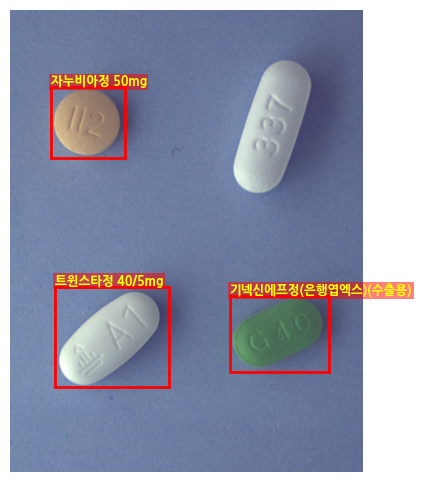

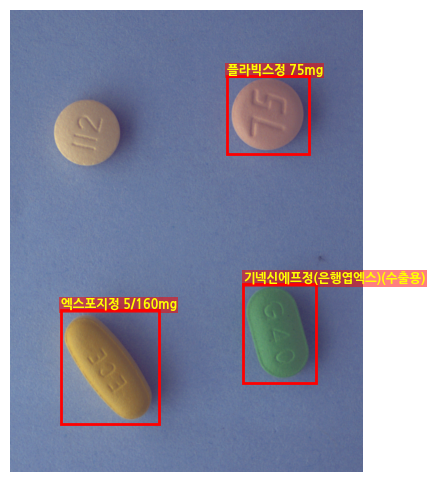

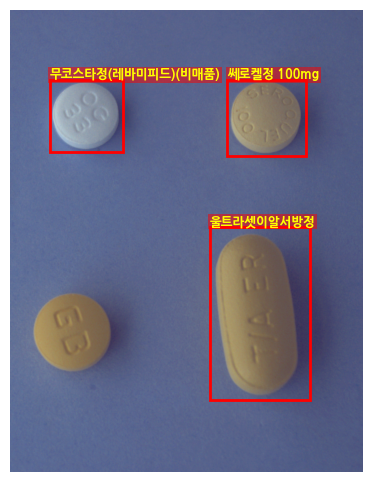

In [27]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_random(n=3):
    candidates = df["file_name"].unique().tolist()
    for file_name in random.sample(candidates, k=min(n, len(candidates))):
        path = os.path.join(IMG_DIR, file_name)
        if not os.path.exists(path):
            print("이미지 없음:", path); continue

        img = Image.open(path)
        fig, ax = plt.subplots(1, figsize=(6, 6))
        ax.imshow(img)
        ax.axis("off")

        rows = df[df["file_name"] == file_name]
        for _, r in rows.iterrows():
            rect = patches.Rectangle((r["x"], r["y"]), r["w"], r["h"],
                                     linewidth=2, edgecolor="r", facecolor="none")
            ax.add_patch(rect)
            ax.text(r["x"], max(0, r["y"]-5), r["category_name"],
                    color="yellow", fontsize=9, weight="bold",
                    bbox=dict(facecolor="red", alpha=0.5, edgecolor="none", pad=1))
        plt.show()

show_random(3)


---